In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Dataset 

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
# variable information (Specifying data type whether Numerical or Catgorical)
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

# Data Preprocessing & Cleaning
Steps:
* Load Dataset into DataFrame using Pandas
* Handle missing values
* Perform Data encoding
* Standardise numerical data using StandardScaler()
* Conduct EDA with histograms, correlation heatmaps and boxplots

1. Load Dataset into DataFrame using Pandas

In [3]:
# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Save to CSV
df.to_csv("heart_diseases.csv", index=False)
print("✅Dataset saved as heart_diseases.csv")

✅Dataset saved as heart_diseases.csv


In [4]:
# Visualise the DataFrame's info
print("Summary of the data file:")
df.info()
print("Dataset shape:", df.shape)
print("\nThe first 10 data records:\n",df.head(10))

Summary of the data file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
Dataset shape: (303, 14)

The first 10 data records:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150    

2. Handle missing values

In [5]:
# Identify missing data per column
print("Missing values before imputation:\n", df.isnull().sum())

# Drop rows with all missing values
df = df.dropna(how='all')

# Fill numerical NaNs with column mean and categorical NaNs with mode
categ_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in df.columns:
    if col in categ_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
        
print("\nMissing values after imputation:\n", df.isnull().sum())

Missing values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


3. Perform Data Encoding to Categorical (Binary/Multi-class) features

In [6]:
# Encode categorical data using one-hot encoding
df = pd.get_dummies(df, columns=categ_cols, drop_first=False)
df = df.astype(int)

print("\nThe first 10 data records after encoding:\n",df.head(10))
print("\nColumns after encoding:\n", df.columns.tolist())
print("Encoded DataFrame shape:", df.shape)


The first 10 data records after encoding:
    age  trestbps  chol  thalach  oldpeak  ca  num  sex_0  sex_1  cp_1  ...  \
0   63       145   233      150        2   0    0      0      1     1  ...   
1   67       160   286      108        1   3    2      0      1     0  ...   
2   67       120   229      129        2   2    1      0      1     0  ...   
3   37       130   250      187        3   0    0      0      1     0  ...   
4   41       130   204      172        1   0    0      1      0     0  ...   
5   56       120   236      178        0   0    0      0      1     0  ...   
6   62       140   268      160        3   2    3      1      0     0  ...   
7   57       120   354      163        0   0    0      1      0     0  ...   
8   63       130   254      147        1   1    2      0      1     0  ...   
9   53       140   203      155        3   0    1      0      1     0  ...   

   restecg_1  restecg_2  exang_0  exang_1  slope_1  slope_2  slope_3  \
0          0          1  

4. Standardise Numerical (Non-Categorical) features

In [7]:
# Extract all numerical features to be standardised
num_cols =  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nThe first 10 data records after encoding & standardisation:\n",df.head(10))
print("\nStandardised features:\n", df[num_cols].head(10))
print("Encoded & Standardised DataFrame shape:", df.shape)


The first 10 data records after encoding & standardisation:
         age  trestbps      chol   thalach   oldpeak        ca  num  sex_0  \
0  0.948726  0.757525 -0.264900  0.017197  1.154475 -0.711131    0      0   
1  1.392002  1.611220  0.760415 -1.821905  0.219165  2.504881    2      0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.154475  1.432877    1      0   
3 -1.932564 -0.096170  0.063974  1.637359  2.089785 -0.711131    0      0   
4 -1.489288 -0.096170 -0.825922  0.980537  0.219165 -0.711131    0      1   
5  0.172994 -0.665300 -0.206864  1.243266 -0.716145 -0.711131    0      0   
6  0.837908  0.472960  0.412195  0.455079  2.089785  1.432877    3      1   
7  0.283813 -0.665300  2.075914  0.586443 -0.716145 -0.711131    0      1   
8  0.948726 -0.096170  0.141357 -0.114167  0.219165  0.360873    2      0   
9 -0.159462  0.472960 -0.845268  0.236138  2.089785 -0.711131    1      0   

   sex_1  cp_1  ...  restecg_1  restecg_2  exang_0  exang_1  slope_1  slope_2  \
0      1 

5. Conduct Expolratory Data Analysis (EDA)

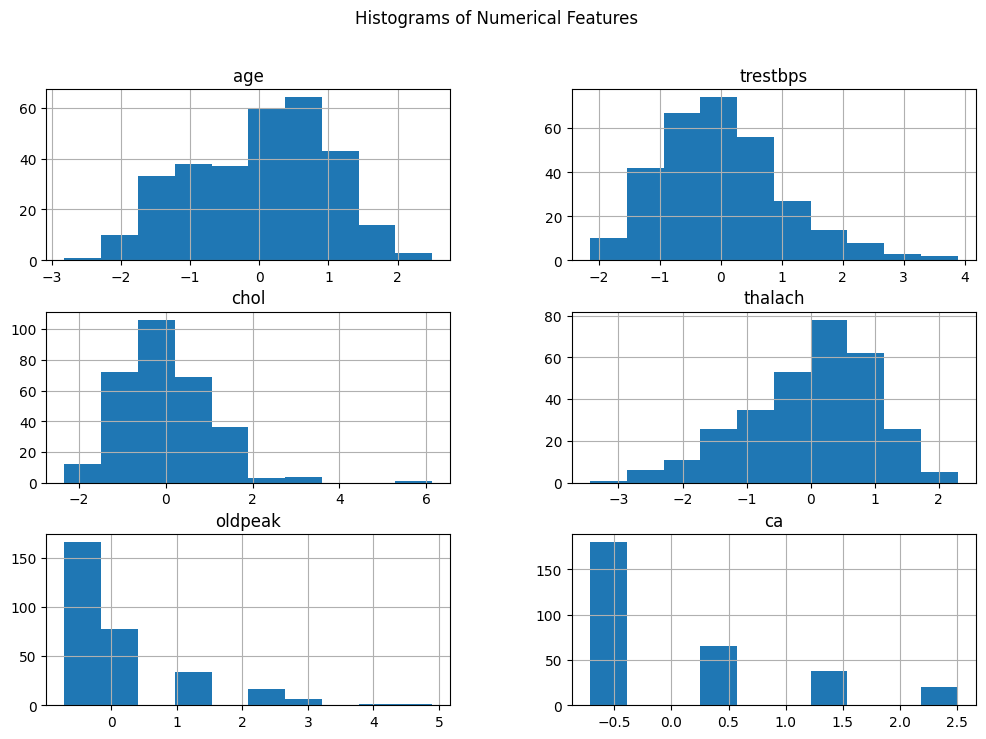

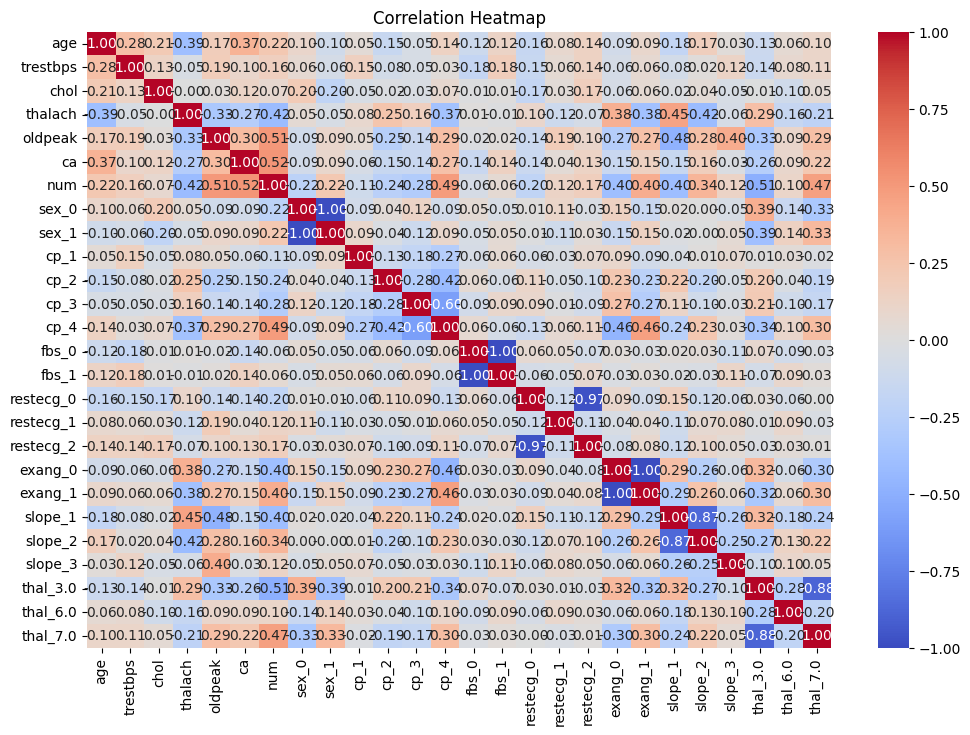

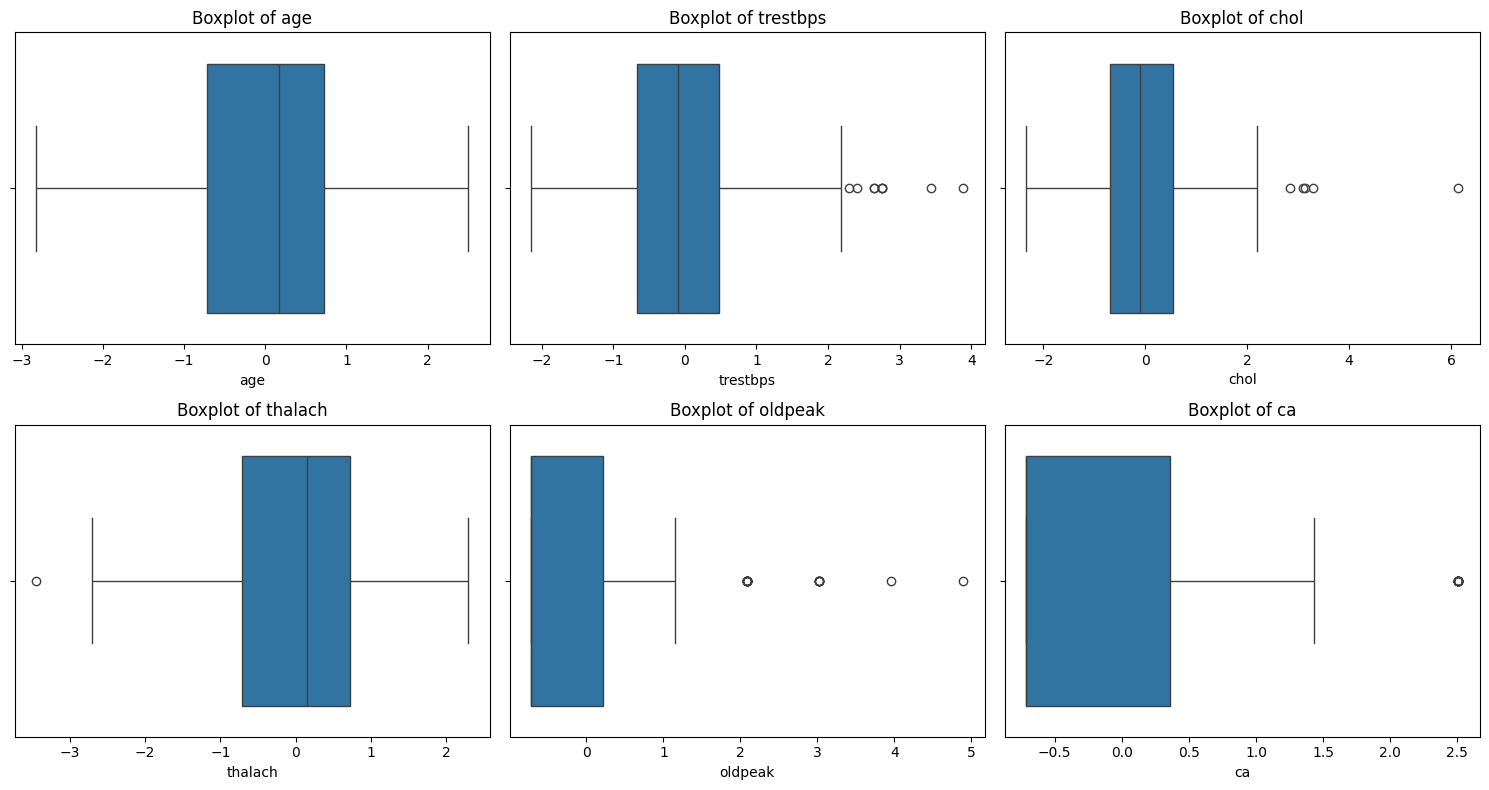

In [8]:
# Histograms for numerics
df[num_cols].hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Save the preprocessed dataset as a csv file

In [9]:
# Save preprocessed dataset to CSV
df.to_csv("preprocessed_dataset.csv", index=False)
print("✅Cleaned, pre-processed data saved as 'preprocessed_dataset.csv' ready for modelling!")

✅Cleaned, pre-processed data saved as 'preprocessed_dataset.csv' ready for modelling!
